## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
# Loading data of each model and selection only the NSE and Basins columns

results_ffnn_2 = pd.read_csv("../../database/output/ResultadosFFNN2.csv")[['Bacia', 'NSE']]\
                     .rename({"NSE": "FFNN-2"},axis=1)\
                     .set_index("Bacia")

results_ffnn_3 = pd.read_csv("../../database/output/Results/ResultadosFFNN3.csv")[['Bacia', 'NSE']]\
                     .rename({"NSE": "FFNN-3"},axis=1)\
                     .set_index("Bacia")

results_ffnn_ic  = pd.read_csv("../../database/output/Results/ResultadosFFNN_ic.csv")[['Bacia', 'NSE']]\
                     .rename({"NSE": "FFNN-ic"},axis=1)\
                     .set_index("Bacia")

results_lstm  = pd.read_csv("../../database/output/Results/ResultadosNewLSTM-rg.csv")[['Bacia', 'NSE']]\
                     .rename({"NSE": "LSTM-rg"},axis=1)\
                     .set_index("Bacia")

results_lstm_ic = pd.read_csv("../../database/output/Results/ResultadosLSTM_ic.csv")[['Bacia', 'NSE']]\
                     .rename({"NSE": "LSTM-ic"},axis=1)\
                     .set_index("Bacia")

results_smap = pd.read_excel("../../database/Table_2.xlsx",sheet_name="In_use",skiprows=2)\
                 .rename(columns={"Unnamed: 0":"Bacia","Unnamed: 1":"N_obs"})\
                 [['Bacia','N_obs','SMAP-ic','SMAP-rg']].set_index("Bacia")


In [3]:
# Joining all the DataFrames
results = results_smap.join(results_ffnn_ic)\
                      .join(results_lstm_ic)\
                      .join(results_ffnn_2)\
                      .join(results_ffnn_3)\
                      .join(results_lstm)

# Reordering the columns orders
results = results[['N_obs', 'FFNN-ic', 'LSTM-ic', 'SMAP-ic',
                   'FFNN-2', 'FFNN-3', 'LSTM-rg', 'SMAP-rg']]

results

,N_obs,FFNN-ic,LSTM-ic,SMAP-ic,FFNN-2,FFNN-3,LSTM-rg,SMAP-rg
Bacia,,,,,,,,
34730000,475,0.191834,0.100533,0.018,-3.558889,-4.854282,-3.215907,NaN
34740000,92,0.198764,0.623726,0.610,0.505180,0.440019,0.564236,NaN
34750000,514,0.746883,0.751388,0.831,0.882741,0.880909,0.822700,0.810
35050000,115,0.680192,0.911937,0.673,0.541874,0.477216,0.367468,0.390
35125000,328,0.895971,0.890220,0.906,0.915184,0.902520,0.884909,0.884
35170000,462,0.939170,0.923450,0.947,0.894877,0.863140,0.785033,0.901
35210000,578,0.910415,0.942873,0.787,0.925421,0.874079,0.814373,0.781
35223000,130,0.069154,0.172218,0.770,0.278338,0.099686,0.181774,NaN
35240000,421,0.454520,0.496425,0.451,0.739142,0.508759,0.614929,NaN


In [4]:
results[results["SMAP-rg"].notna()].median()

N_obs      435.500000
FFNN-ic      0.779809
LSTM-ic      0.790541
SMAP-ic      0.796500
FFNN-2       0.866111
FFNN-3       0.804186
LSTM-rg      0.807759
SMAP-rg      0.767000
dtype: float64

### Figure 6

In [5]:
def log_ratio(x1, x2):
    if x1 >= 0 and x2 > 0:
        return np.log10(x1/x2)
    elif x1 < 0 and x2 > 0:
        return -1
    elif  x1 >= 0 and x2 < 0:
        return 1
    else:
        return 0

In [6]:
ratio_ic_models = results.apply(lambda x: log_ratio(x["LSTM-ic"], x["FFNN-ic"]), axis=1)

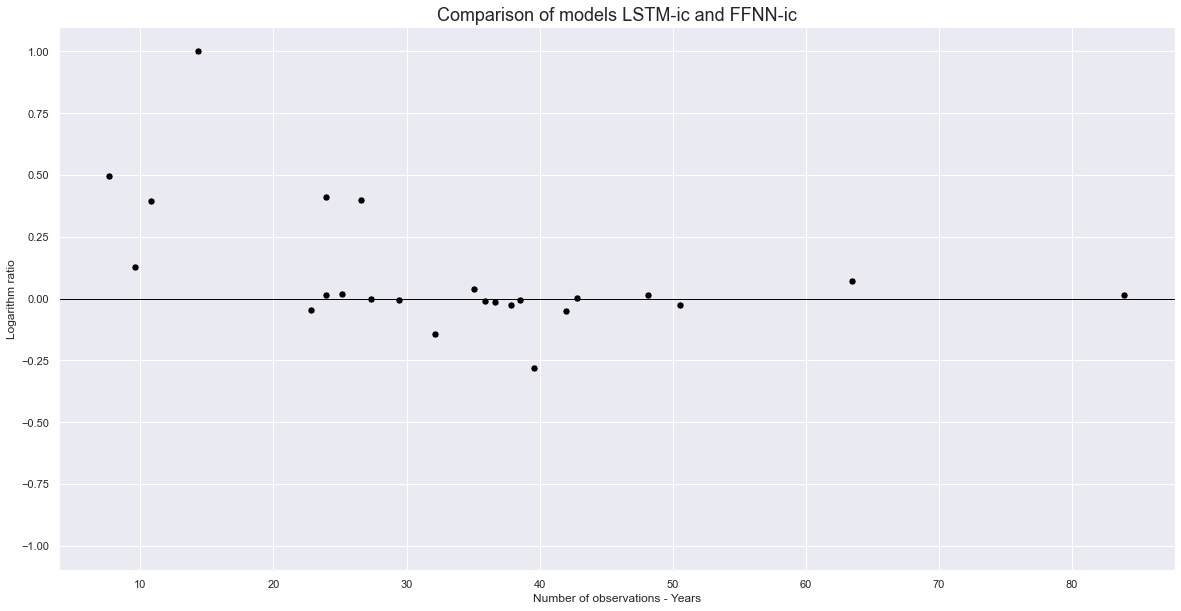

In [7]:
# Figure size
plt.figure(figsize=(20,10))

# Plot styles
sns.set_theme(style="whitegrid")
sns.set_color_codes("dark")
sns.set_style("darkgrid")

# Scatter plot
abs_ = max(abs(ratio_ic_models))
sns.scatterplot(x=results["N_obs"]/12 , 
                y=ratio_ic_models,
                s = 50,
                facecolor='#000')
plt.ylim([-(abs_+0.1), abs_+0.1])
plt.axhline(linewidth=1, color='#000')
# Labels
sns.set(font_scale=1.5)
plt.title("Comparison of models LSTM-ic and FFNN-ic")
plt.ylabel("Logarithm ratio")
plt.xlabel("Number of observations - Years")
plt.savefig("../../database/output/Plots/Article/Figure6.png", dpi=300)

### Figure 7

In [8]:
def to_boxplot_df(df):
    boxplot_df = pd.melt(df)
    boxplot_df = boxplot_df.rename(columns={
    "variable":"Model",
    "value":"NSE"})
    return boxplot_df
models_labels = results.columns[1:]

In [9]:
boxplot_df = to_boxplot_df(results[~results["SMAP-rg"].isna()][models_labels])

boxplot_df.head()

,Model,NSE
0,FFNN-ic,0.746883
1,FFNN-ic,0.680192
2,FFNN-ic,0.895971
3,FFNN-ic,0.939170
4,FFNN-ic,0.910415


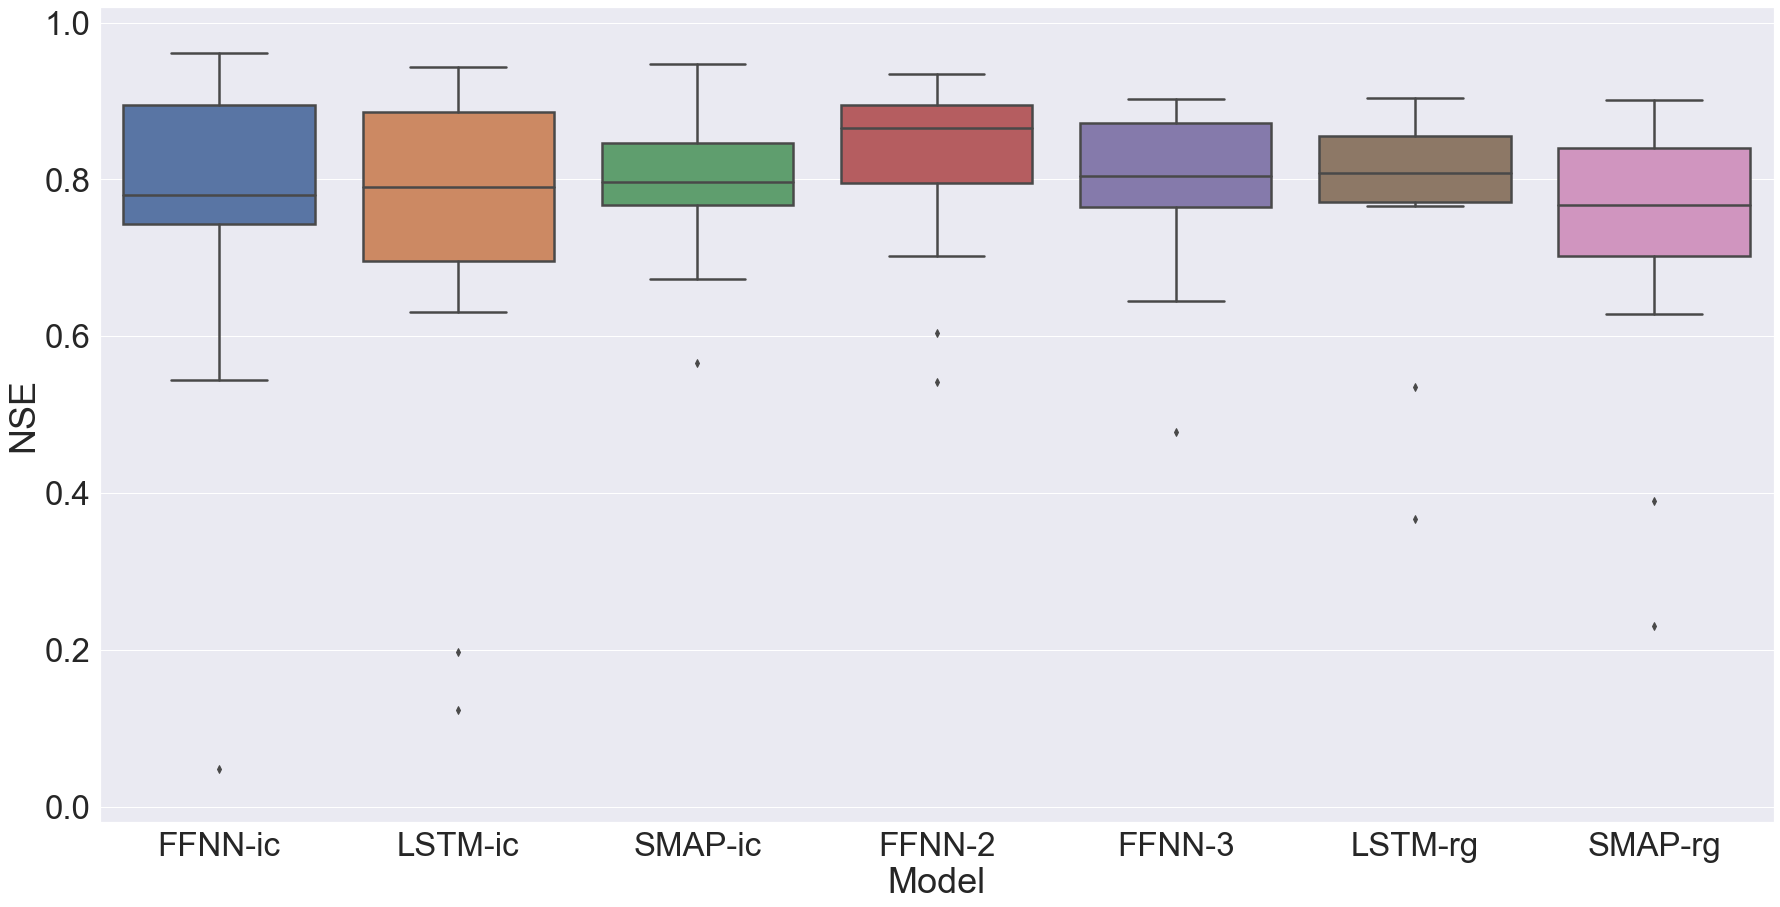

In [10]:
fig = plt.figure(figsize=(30,15))

sns.set_theme(style="whitegrid")

sns.set_color_codes("dark")

sns.set_style("darkgrid", 
#               {"axes.facecolor": ".9"}
             )

sns.set(font_scale=3)
plt.ylim([-0.02,1.02])
# plt.title("Comparison of models",fontdict={'fontsize': 45})
sns.boxplot(x='Model',y='NSE',data=boxplot_df,linewidth=2.5)

plt.show()
fig.savefig("../../database/output/Plots/Article/Figure7.png", dpi=300)

### Figure 8

In [11]:
# Ratio of FFNN-2 and FFNN-3 over LSTM-rg

ratio_ffnn2_lstm = results[results["SMAP-rg"].notna()]\
                        .apply(lambda x: log_ratio(x["FFNN-2"], x["LSTM-rg"]),
                               axis=1)

ratio_ffnn3_lstm = results[results["SMAP-rg"].notna()]\
                        .apply(lambda x: log_ratio(x["FFNN-3"], x["LSTM-rg"]), 
                               axis=1)

# Ratio of FFNN-2 and FFNN-3 over SMAP
ratio_ffnn2_smap = results[results["SMAP-rg"].notna()]\
                        .apply(lambda x: log_ratio(x["FFNN-2"], x["SMAP-rg"]), 
                               axis=1)
ratio_ffnn3_smap = results[results["SMAP-rg"].notna()]\
                        .apply(lambda x: log_ratio(x["FFNN-3"], x["SMAP-rg"]),
                               axis=1)

In [12]:
fig_8_ylabel = ["Logarithm ratio - FFNN-2 X LSTM-rg",
               "Logarithm ratio - FFNN-3 X LSTM-rg",
               "Logarithm ratio - FFNN-2 X SMAP-rg",
               "Logarithm ratio - FFNN-3 X SMAP-rg"]
fig_8_ratios = [ratio_ffnn2_lstm,
               ratio_ffnn3_lstm,
               ratio_ffnn2_smap,
               ratio_ffnn3_smap]

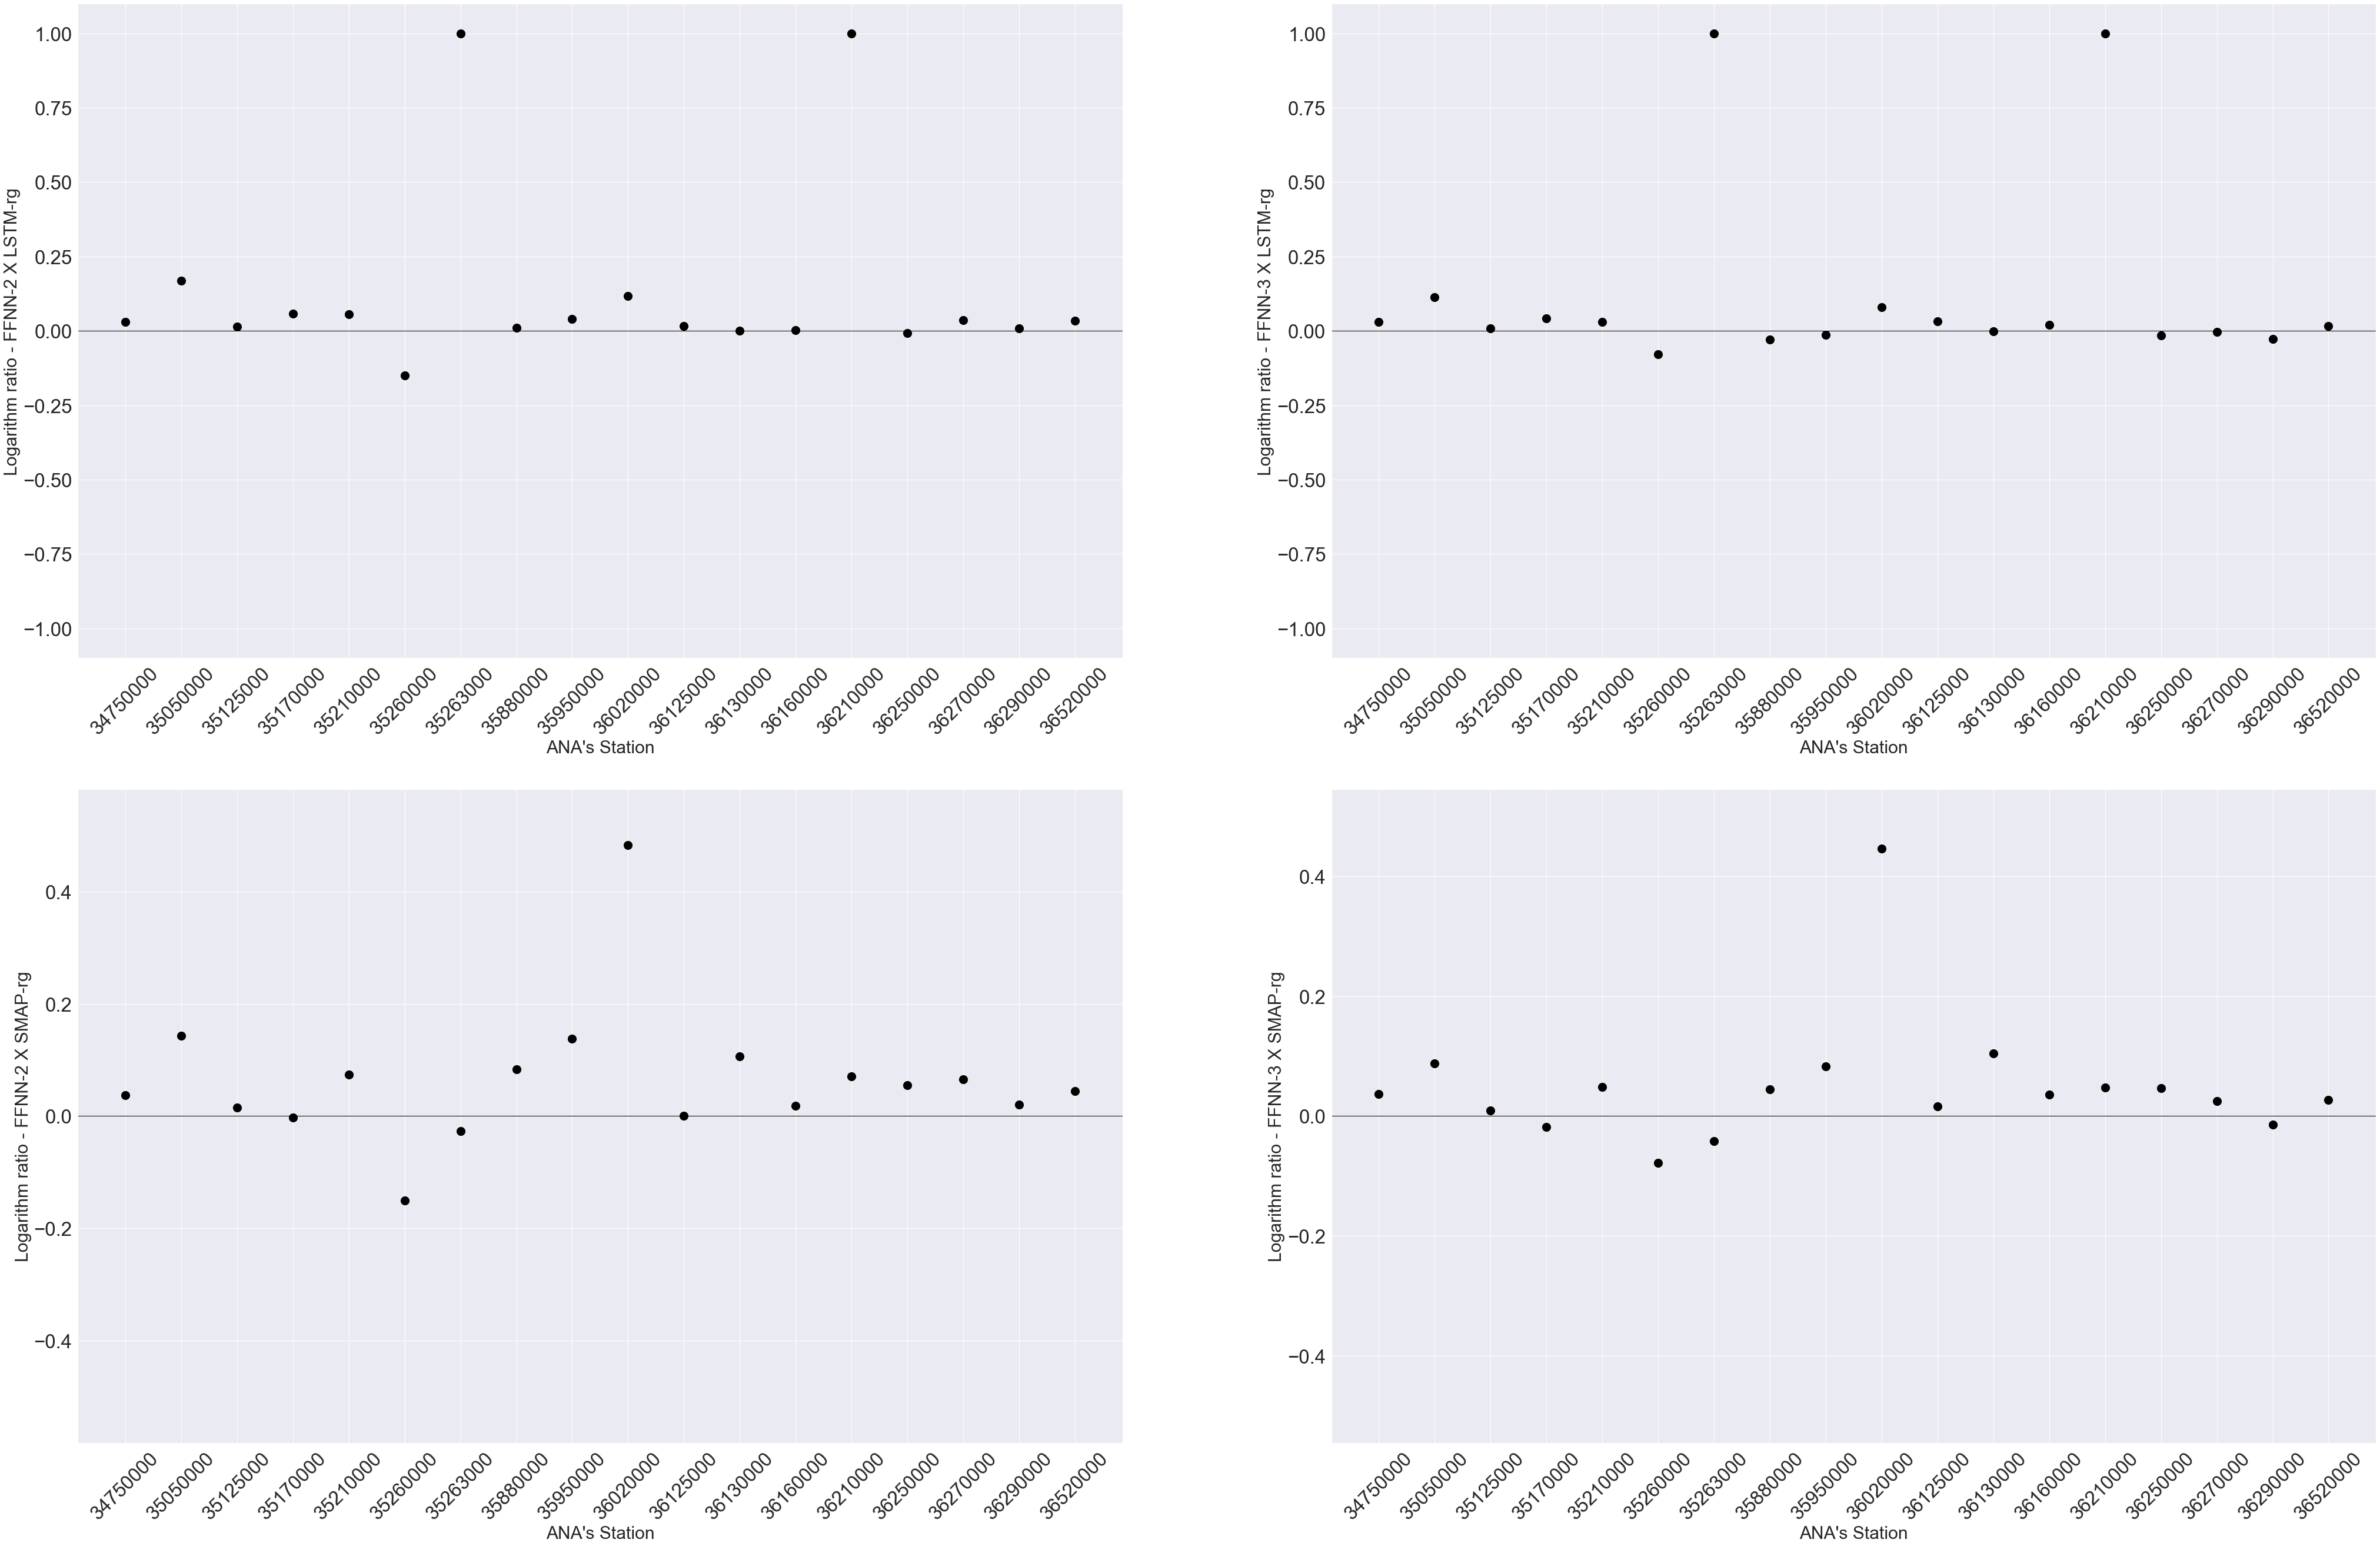

In [13]:
fig, axs = plt.subplots(2, 2,figsize=(70, 45))

for (i,j,k) in [(0,0,0),(0,1,1),(1,0,2),(1,1,3)]:

    # Scatter Plot
    axs[i,j].scatter(x=results[results["SMAP-rg"].notna()].index.astype(str),
                     y=fig_8_ratios[k], s=200,
                     facecolor='#000')
    
    # Labels
    axs[i,j].set_xlabel("ANA's Station",fontsize=30)
    axs[i,j].set_ylabel(fig_8_ylabel[k],fontsize=30)
    
     # Maximum and minimum Y axis values
    abs_ = max(abs(fig_8_ratios[k][fig_8_ratios[k].notna()]))
    axs[i,j].set_ylim([-(abs_+0.1), abs_+0.1])
    
    # Rotation of x values
    axs[i,j].tick_params(axis='x', labelrotation=45)
    
    # X axis line
    axs[i,j].axhline(linewidth=1, color='#000')
    
# fig.show()
fig.savefig("../../database/output/Plots/Article/Figure8.png", dpi=300)

### Figure 8

In [14]:
physical_characteristics = pd.read_excel("../../database/input/dados.xls",sheet_name="Resultados")\
                             .drop(["SAT","PES","Nash","Nash Ver"],axis=1)\
                             .set_index('Estações ANA')\
                             .query("`Estações ANA`!=36220000")


In [15]:
physical_characteristics_en = {
    0 :"Declivity - D (%)",
    3:"Contribution area of the fluviometric station - A (km2)",
    5:"Total drainage length - CTD (km)",
    6:"Drainage density - DD (km-1)",
    7:"Soil water storage capacity (CAD) (mm)",
    8:"Average Curve Number– CN (mm)",
    9:"Basin compactness coefficient (Kc) - Kc",
    10:"Portion of the basin in the crystalline rock - Cr"

}


In [16]:
physical_characteristics_en.keys()

dict_keys([0, 3, 5, 6, 7, 8, 9, 10])

In [17]:
subplot_indices = ((0,0),(0,1),(0,2),(0,3),
                   (1,0),(1,1),(1,2),(1,3))

/var/folders/wy/bhx55wjj6dl6fh49m42b0xyc0000gn/T/ipykernel_40760/3439082138.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


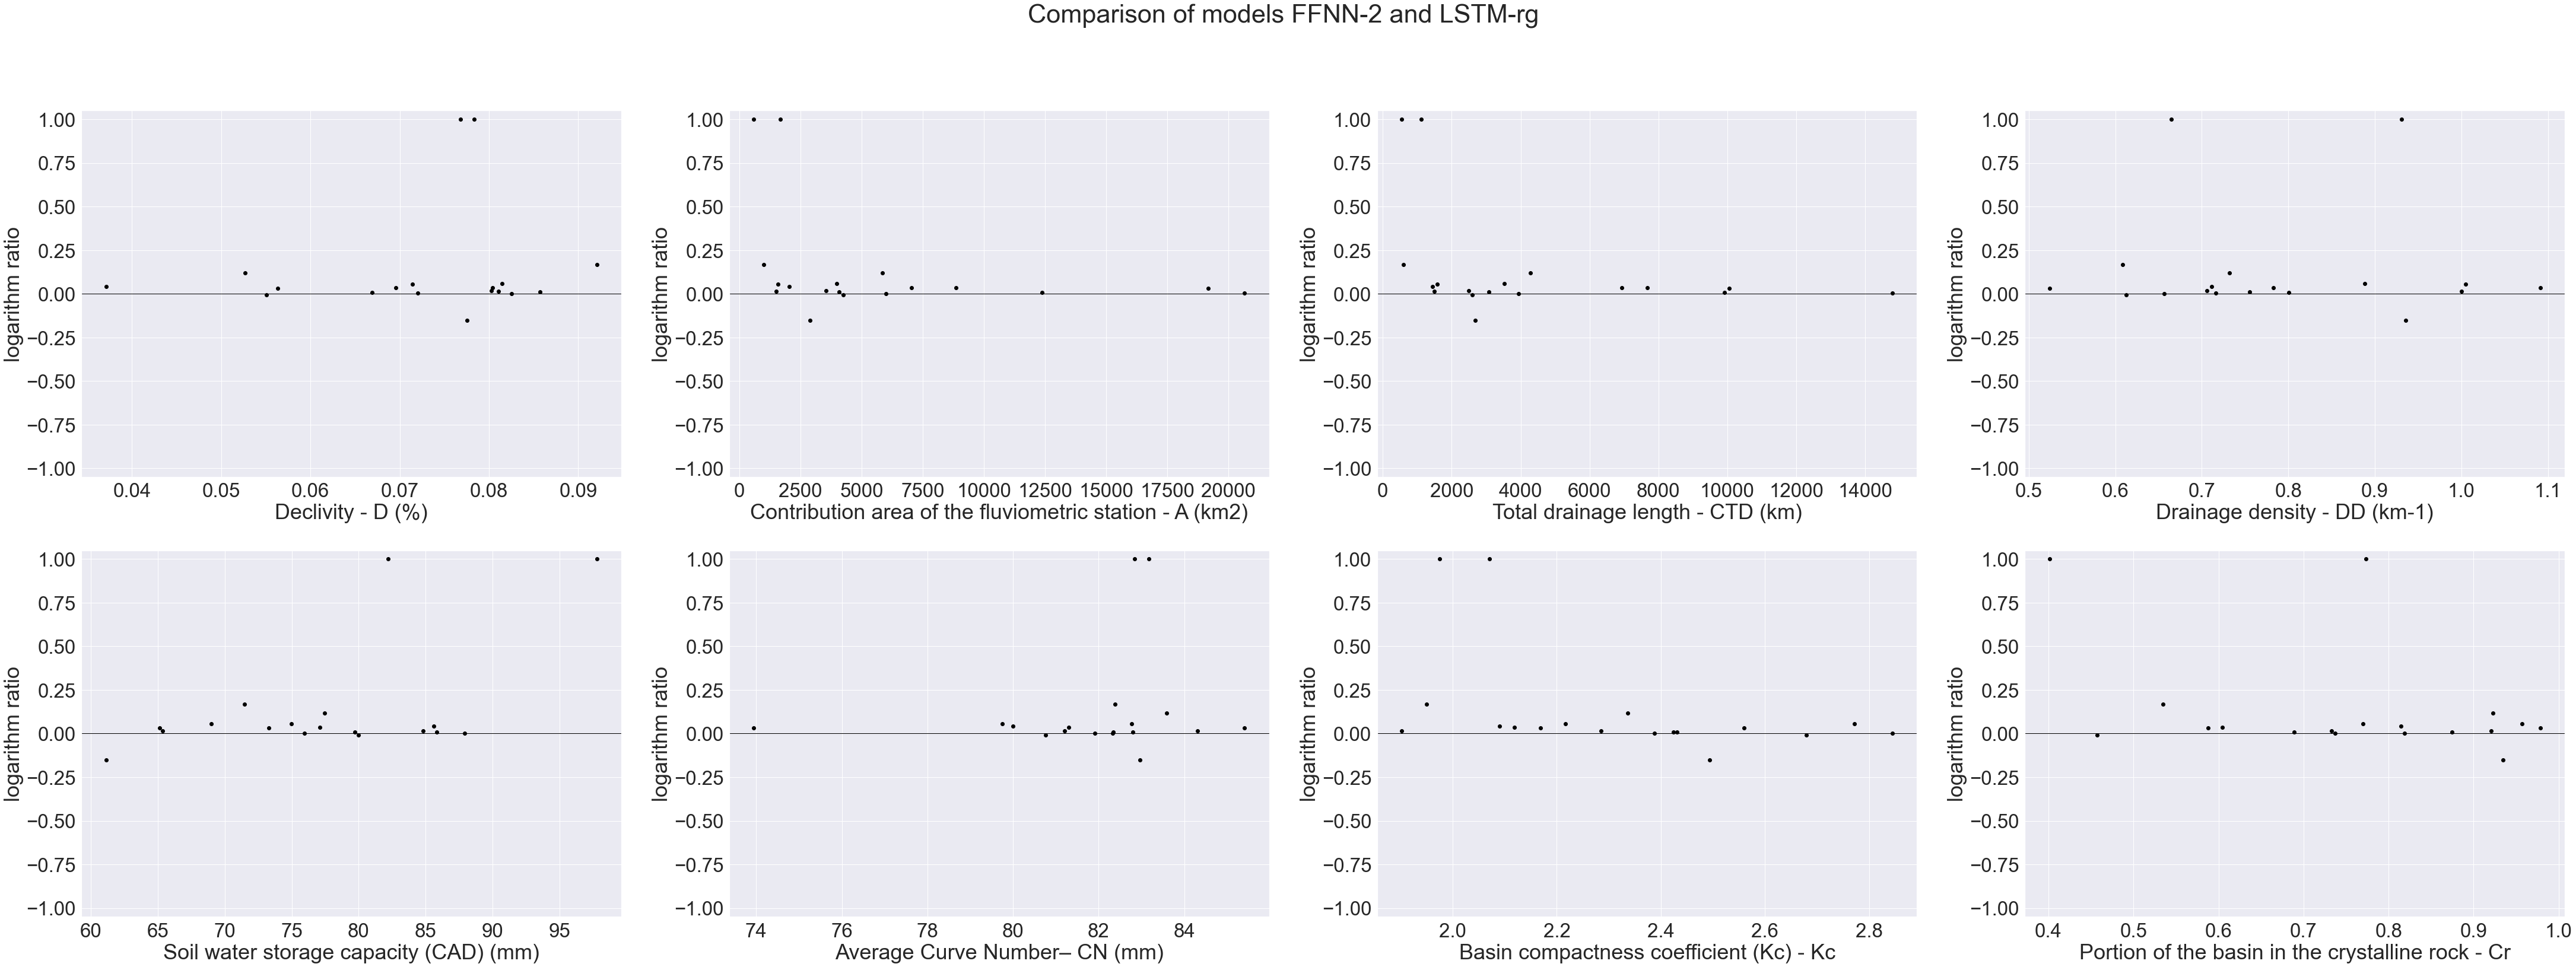

In [18]:
fig, axs = plt.subplots(2, 4,figsize=(75, 25))
fig.suptitle('Comparison of models FFNN-2 and LSTM-rg')

abs_ = max(abs(ratio_ffnn2_lstm))
for ((i,j),k) in zip(subplot_indices,physical_characteristics_en.keys()):
    # Scatter Plot
    axs[i,j].scatter(physical_characteristics[results["SMAP-rg"].notna()][physical_characteristics.columns[k]],
                     ratio_ffnn2_lstm,facecolor='#000')
    
    # Axis labels
    axs[i,j].set_xlabel(f"{physical_characteristics_en[k]}")
    axs[i,j].set_ylabel("logarithm ratio")
    
    # Y axis maximum and minimum values    
    axs[i,j].set_ylim([-(abs_+0.05), abs_+0.05])
    
    # Axis line where y=0
    axs[i,j].axhline(linewidth=1, color='#000')


fig.show()
fig.savefig("../../database/output/Plots/Article/Figure9.png", dpi=300)

### Figure 10

In [19]:
# Ratio of -rg over -ic of same archtecture

ratio_ffnn2_ffnnic = results[results["SMAP-rg"].notna()]\
                        .apply(lambda x: log_ratio(x["FFNN-2"], x["FFNN-ic"]),
                               axis=1)

ratio_lstmrg_lstmic = results[results["SMAP-rg"].notna()]\
                        .apply(lambda x: log_ratio(x["LSTM-rg"], x["LSTM-ic"]),
                               axis=1)

In [20]:
fig_10_ylabel = ["Logarithm ratio - FFNN-2 X FFNN-ic",
               "Logarithm ratio - LSTM-rg X LSTM-ic"]
fig_10_ratios = [ratio_ffnn2_ffnnic,
               ratio_lstmrg_lstmic]

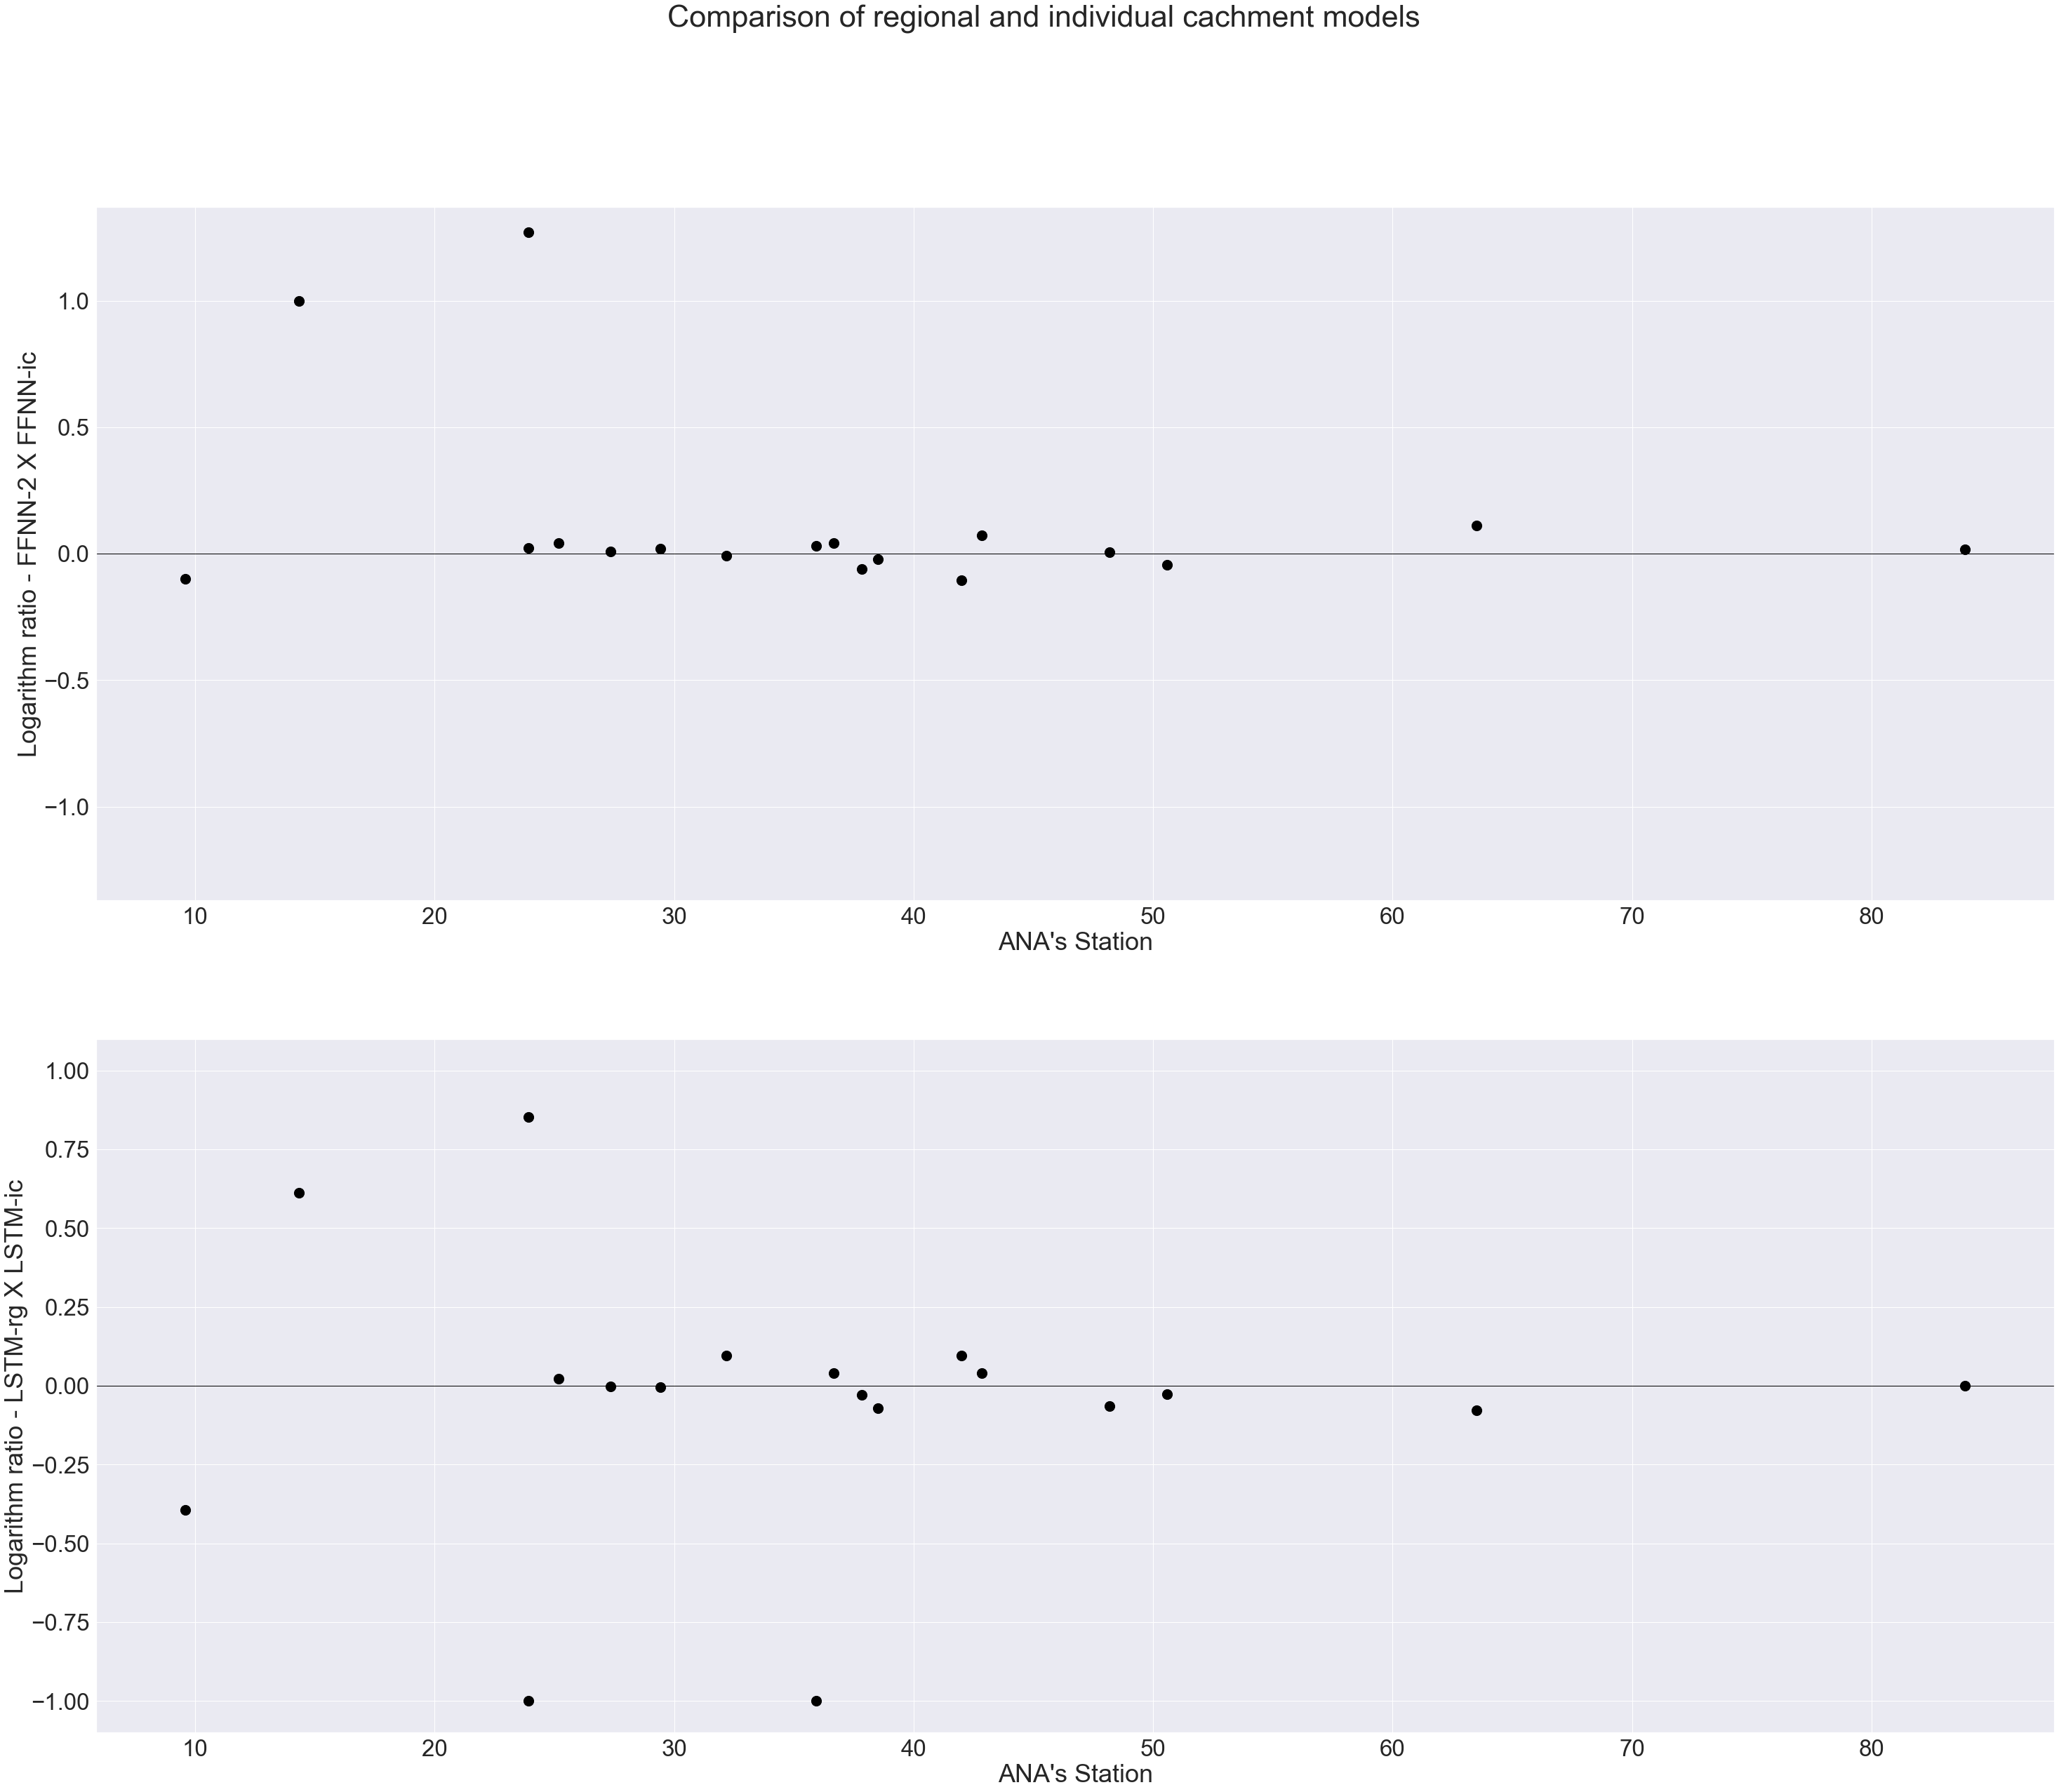

In [30]:
fig, axs = plt.subplots(2, 1,figsize=(50, 40))
fig.suptitle('Comparison of regional and individual cachment models')
for (i,k) in [(0,0),(1,1)]:

    # Scatter Plot 
    axs[i].scatter(x=results[results["SMAP-rg"].notna()]["N_obs"]/12,
                     y=fig_10_ratios[k], s=200,
                     facecolor='#000')
    
    # Labels
    axs[i].set_xlabel("ANA's Station")
    axs[i].set_ylabel(fig_10_ylabel[k])
    
     # Maximum and minimum Y axis values
    abs_ = max(abs(fig_10_ratios[k][fig_10_ratios[k].notna()]))
    axs[i].set_ylim([-(abs_+0.1), abs_+0.1])
    
    
    # X axis line
    axs[i].axhline(linewidth=1, color='#000')
    
# fig.show()
fig.savefig("../../database/output/Plots/Article/Figure10.png", dpi=300)

### Table 3

In [22]:
results.to_csv("../../database/output/Plots/Article/20220226-results.csv")

results

,N_obs,FFNN-ic,LSTM-ic,SMAP-ic,FFNN-2,FFNN-3,LSTM-rg,SMAP-rg
Bacia,,,,,,,,
34730000,475,0.191834,0.100533,0.018,-3.558889,-4.854282,-3.215907,NaN
34740000,92,0.198764,0.623726,0.610,0.505180,0.440019,0.564236,NaN
34750000,514,0.746883,0.751388,0.831,0.882741,0.880909,0.822700,0.810
35050000,115,0.680192,0.911937,0.673,0.541874,0.477216,0.367468,0.390
35125000,328,0.895971,0.890220,0.906,0.915184,0.902520,0.884909,0.884
35170000,462,0.939170,0.923450,0.947,0.894877,0.863140,0.785033,0.901
35210000,578,0.910415,0.942873,0.787,0.925421,0.874079,0.814373,0.781
35223000,130,0.069154,0.172218,0.770,0.278338,0.099686,0.181774,NaN
35240000,421,0.454520,0.496425,0.451,0.739142,0.508759,0.614929,NaN


### Table 4

In [23]:
def apply_by_col(data,f):
    """Wrap the functions to apply some function on columns
    of a Pandas DataFrame and numpy array"""
    
    if type(data) == np.ndarray:
        return np.apply_along_axis(f,0,data)
    
    elif type(data) == pd.core.frame.DataFrame:
        return pd.DataFrame(data.apply(lambda x: f(x))).transpose()
    
    else:
        raise TypeError("data must be a valid type: 'pandas.core.frame.DataFrame' or 'numpy.darray'")

In [24]:
def stack_data(data,new_data):
    "Wrap the functions to stack Pandas DataFrame and numpy array"
    
    if type(data) == type(new_data) == np.ndarray:
        return np.vstack([data,new_data])
    
    elif type(data) == type(new_data) == pd.core.frame.DataFrame:
        return pd.concat([data,new_data],ignore_index=True)
    
    else:
        raise TypeError("data and new_data must have a valid and be the same type: 'pandas.core.frame.DataFrame' or 'numpy.darray'")

In [25]:
from tqdm import tqdm
from sklearn.utils import resample

In [26]:
def Bootstrap(data,n_rounds,seed,stat="mean"):
    """
    Allow us to create an Bootstrap dataset and compute a bootstrapped statistic
    for each model of our results
    """
    functions_pool = {"mean":np.mean,
                      "median":np.median}
    f = functions_pool[stat]
    
    for i in tqdm(range(n_rounds)):
        boot = resample(data,
                     replace=True, 
                     n_samples=data.shape[0], 
                     random_state=seed, 
                     stratify=None)
        round_medians = apply_by_col(boot,f)
        if i == 0:
            medians = round_medians
        else:
            medians = stack_data(medians,round_medians)
        seed+=1
    return medians

In [27]:
#Using median
boot = Bootstrap(data = results[results["SMAP-rg"].notna()].drop(columns=["N_obs"]),
          n_rounds = 1000,
          seed = 400,
          stat="median")

apply_by_col(boot,
             np.median)

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 274.74it/s]


,FFNN-ic,LSTM-ic,SMAP-ic,FFNN-2,FFNN-3,LSTM-rg,SMAP-rg
0,0.779809,0.790541,0.7965,0.866111,0.804186,0.807759,0.767


In [28]:
def std196(data):
    return data.std()*1.96


In [29]:
boot.agg(["median","std",std196]).to_csv("../../database/output/Plots/Article/20220226-bootstrapped_results.csv")
boot.agg(["median","std",std196])

,FFNN-ic,LSTM-ic,SMAP-ic,FFNN-2,FFNN-3,LSTM-rg,SMAP-rg
median,0.779809,0.790541,0.796500,0.866111,0.804186,0.807759,0.767000
std,0.046651,0.053334,0.016464,0.025726,0.022799,0.027933,0.036459
std196,0.091437,0.104534,0.032269,0.050423,0.044685,0.054749,0.071461
